# Análise dos dataset

Este notebook consiste em analisar os dataset de para criar features para alimentar um modelo de Machine Learning. Ao analisar cada variável queremos ver se as mesmas tem influencia direta na variação do `Churn` (Cancelamento).

In [1]:
# importando as bibliotecas
import sys
sys.path.append('../')
import suporte.suportedata as sd


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clientes = pd.read_json('../dados/Telco-Customer-Churn-limpeza.json')

In [3]:
# configurações inicias
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [4]:
clientes.head()

,customerID,Churn,Genero,Maior65anos,Conjuge,Dependentes,MesesDeContrato,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,GastoMensal,GastoTotal,GastoDiario
0,0002-ORFBO,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um Ano,Sim,Envio de Cheque,65.6,593.30,2.19
1,0003-MKNFE,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Envio de Cheque,59.9,542.40,2.00
2,0004-TLHLJ,Sim,Homem,0,Não,Não,4,Sim,Não,Fibra Optica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletronico,73.9,280.85,2.46
3,0011-IGKFF,Sim,Homem,1,Sim,Não,13,Sim,Não,Fibra Optica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletronico,98.0,1237.85,3.27
4,0013-EXCHZ,Sim,Mulher,1,Sim,Não,3,Sim,Não,Fibra Optica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Envio de Cheque,83.9,267.40,2.80


# Analisando a taxa de cancelamento

Primeiro é necessário fazer uma analise geral das variáveis quantitativas.

## Análise das variáveis quantitativas

In [5]:
clientes.describe().round(3)

,Maior65anos,MesesDeContrato,GastoMensal,GastoTotal,GastoDiario
count,7043.000,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2279.799,2.159
std,0.369,24.559,30.090,2266.730,1.003
min,0.000,0.000,18.250,18.800,0.610
25%,0.000,9.000,35.500,398.550,1.180
50%,0.000,29.000,70.350,1394.550,2.340
75%,0.000,55.000,89.850,3786.600,2.990
max,1.000,72.000,118.750,8684.800,3.960


Ao analisar as variáveis quantitativas podemos observar o valor médio ***(mean)*** do gasto total e também o seu desvio padrão ***(std)***, assim como o tempo médio de fidelização do cliente.

## Análise das variáveis qualitativas

In [6]:
clientes.describe(include = 'object')

,customerID,Churn,Genero,Conjuge,Dependentes,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Não,Homem,Não,Não,Sim,Não,Fibra Optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque Eletronico
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


Na análise das variáveis qualitativas, podemos observar a quantidade de valores únicos para cada uma delas e também as que possuem maior frequência. Um ponto a ser observado que a grande maioria das várias tem como valores `Sim` e `Não`, porém as variáveis `ServicoInternet` e `contrato` possuem 3 tipos diferentes cada, sendo que nos já vimos os seus tipos de entrar. Isso será importante na hora de prepararmos o nosso modelo de Machine Learning.

## Análises gráficas

### Churn

Antes de analisar outras variáveis é preciso analisar primeiro como se comporta a variável `Churn` dentro do nosso DataFrame.

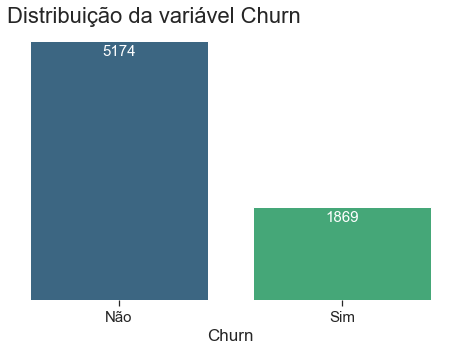

In [7]:
sd.plot_categorica(clientes, 'Churn', 'Distribuição da variável Churn', 'Churn')

In [8]:
print(f'A taxa de Churn (Cancelamento) é de {round((clientes[clientes["Churn"] == "Sim"]).shape[0] / clientes.shape[0] * 100,2)}%')

A taxa de Churn (Cancelamento) é de 26.54%


Após temos uma noção da taxa de cancelamento geral, serão feitas algumas analises comparando a taxa de `Churn` com algumas outras métricas do nosso DataFrame.

### Por tipo de informações dos clientes

Agora que já temos uma panorama da taxa de `Churn`, podemos olhar as outras variáveis usando a taxa de `Churn` como base de comparação entre cada uma das variáveis.

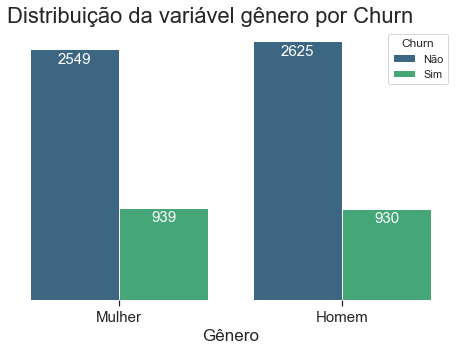

In [9]:
sd.plot_categorica(dataset = clientes,
                x = 'Genero',
                titulo = 'Distribuição da variável gênero por Churn',
                label_x = 'Gênero',
                hue = 'Churn')

In [10]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='Genero',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada Genero
----------------------------------
O opção Mulher tem um total de 939 cancelamentos o que representa a porcetagem de 50.24% dos cancelamentos.
O opção Homem tem um total de 930 cancelamentos o que representa a porcetagem de 49.76% dos cancelamentos.



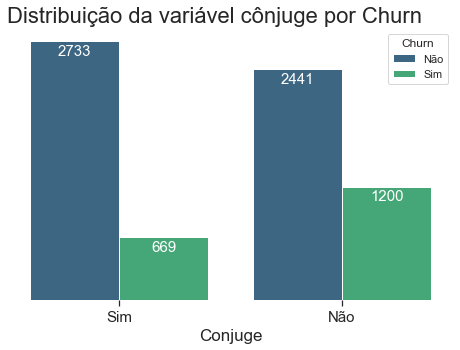

In [11]:
sd.plot_categorica(dataset = clientes,
                x = 'Conjuge',
                titulo = 'Distribuição da variável cônjuge por Churn',
                label_x='Conjuge',
                hue = 'Churn')

In [12]:
sd.comparacao_sim_nao_2(dataset=clientes, col_analisada='Conjuge', col_comparada='Churn', valor_comparado='Sim')

A diferença entra o cancelamento da variável Conjuge é de aproximadamente é de 1.8


In [13]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='Conjuge',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada Conjuge
----------------------------------
O opção Sim tem um total de 669 cancelamentos o que representa a porcetagem de 35.79% dos cancelamentos.
O opção Não tem um total de 1200 cancelamentos o que representa a porcetagem de 64.21% dos cancelamentos.



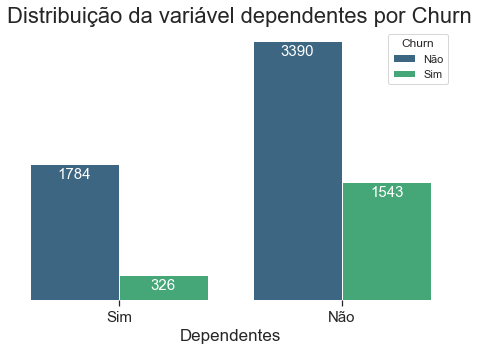

In [14]:
sd.plot_categorica(dataset = clientes,
                x = 'Dependentes',
                titulo = 'Distribuição da variável dependentes por Churn',
                label_x='Dependentes',
                hue = 'Churn')

In [15]:
sd.comparacao_sim_nao_2(dataset=clientes, col_analisada='Dependentes', col_comparada='Churn', valor_comparado='Sim')

A diferença entra o cancelamento da variável Dependentes é de aproximadamente é de 4.7


In [16]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='Dependentes',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada Dependentes
----------------------------------
O opção Sim tem um total de 326 cancelamentos o que representa a porcetagem de 17.44% dos cancelamentos.
O opção Não tem um total de 1543 cancelamentos o que representa a porcetagem de 82.56% dos cancelamentos.



É possível observar que a variável `genero` não causa impacto na taxa de 'Churn', pois seu valores são bem parecidos. 

Porém quando analisamos a variável `conjuges` podemos observar que os que **não** possuem cônjuges tem quase o **dobro** da taxa de `Churn` dos que possuem um companheiro ou companheira. 

Já a variável `dependentes` os que **não** possuem dependentes tem a taxa de `Churn` quase **cinco** vezes maior do que os tem seus dependentes.

### Por tipo de serviços 

Vamos agora olhar cada tipo de serviço, tanto o telefônico quanto o de internet separadamente para entendermos como a taxa de `Churn` se comporta dentro de cada uma dessa variáveis

#### Serviços Telefônico

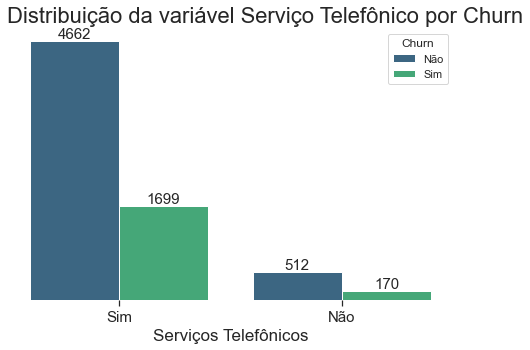

In [17]:
sd.plot_categorica(dataset = clientes,
                x = 'ServicoTelefonico',
                titulo = 'Distribuição da variável Serviço Telefônico por Churn',
                label_x='Serviços Telefônicos',
                hue = 'Churn',
                small=True)

In [18]:
sd.comparacao_sim_nao_2(dataset=clientes,col_analisada='ServicoTelefonico', col_comparada='Churn', valor_comparado='Sim')

A diferença entra o cancelamento da variável ServicoTelefonico é de aproximadamente é de 10.0


In [19]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='ServicoTelefonico',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada ServicoTelefonico
----------------------------------
O opção Sim tem um total de 1699 cancelamentos o que representa a porcetagem de 90.9% dos cancelamentos.
O opção Não tem um total de 170 cancelamentos o que representa a porcetagem de 9.1% dos cancelamentos.



Quando analisamos os clientes que tem o serviço telefônico podemos notar que os clientes que cancelam são **dez vezes mais** dos que não fazem uso deste serviço 

#### Serviços de Internet

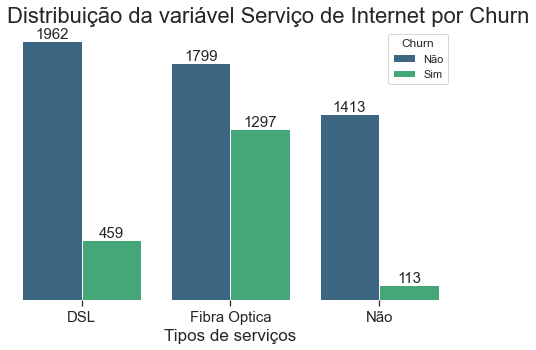

In [20]:
sd.plot_categorica(dataset = clientes,
                x = 'ServicoInternet',
                titulo = 'Distribuição da variável Serviço de Internet por Churn',
                label_x='Tipos de serviços',
                hue = 'Churn',
                small=True)

In [21]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='ServicoInternet',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada ServicoInternet
----------------------------------
O opção DSL tem um total de 459 cancelamentos o que representa a porcetagem de 24.56% dos cancelamentos.
O opção Fibra Optica tem um total de 1297 cancelamentos o que representa a porcetagem de 69.4% dos cancelamentos.
O opção Não tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



Na análise dos serviços de internet o serviço de fibra óptica é a maior taxa de `Churn` dentro dos serviços fornecidos pela **Alura Voz**.

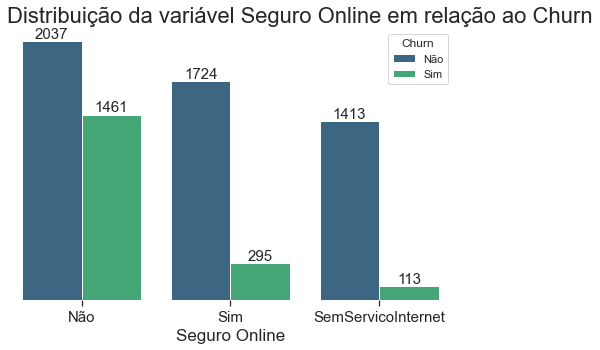

In [22]:
sd.plot_categorica(dataset = clientes,
                    x = 'SeguroOnline',
                    titulo = 'Distribuição da variável Seguro Online em relação ao Churn',
                    label_x = 'Seguro Online', 
                    hue='Churn',
                  small=True)

In [23]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='SeguroOnline',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada SeguroOnline
----------------------------------
O opção Não tem um total de 1461 cancelamentos o que representa a porcetagem de 78.17% dos cancelamentos.
O opção Sim tem um total de 295 cancelamentos o que representa a porcetagem de 15.78% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



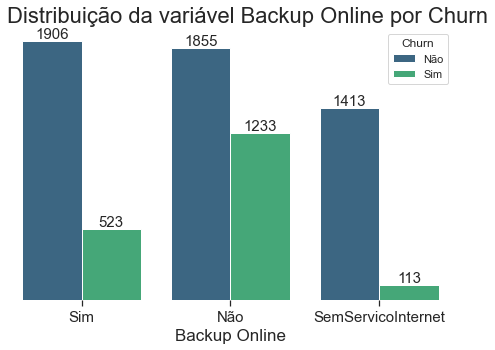

In [24]:
sd.plot_categorica(dataset = clientes,
                x = 'OnlineBackup',
                titulo = 'Distribuição da variável Backup Online por Churn',
                label_x='Backup Online',
                hue = 'Churn', small=True)

In [25]:
sd.porcentagem_do_total(dataset = clientes, col_analisada='OnlineBackup', col_comparada='Churn', valor_comparado='Sim')

Variavel avaliada OnlineBackup
----------------------------------
O opção Sim tem um total de 523 cancelamentos o que representa a porcetagem de 27.98% dos cancelamentos.
O opção Não tem um total de 1233 cancelamentos o que representa a porcetagem de 65.97% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



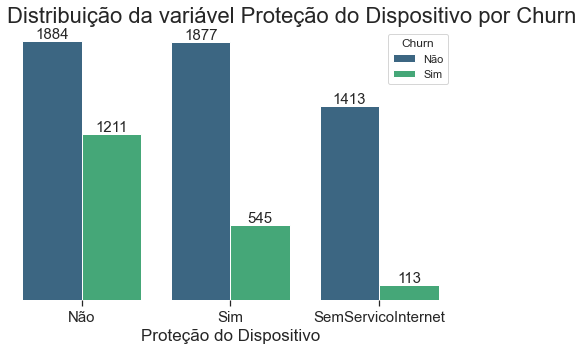

In [26]:
sd.plot_categorica(dataset = clientes,
                x = 'ProtecaoDoDispositivo',
                titulo = 'Distribuição da variável Proteção do Dispositivo por Churn',
                label_x='Proteção do Dispositivo',
                hue = 'Churn', small=True)

In [27]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='ProtecaoDoDispositivo',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada ProtecaoDoDispositivo
----------------------------------
O opção Não tem um total de 1211 cancelamentos o que representa a porcetagem de 64.79% dos cancelamentos.
O opção Sim tem um total de 545 cancelamentos o que representa a porcetagem de 29.16% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



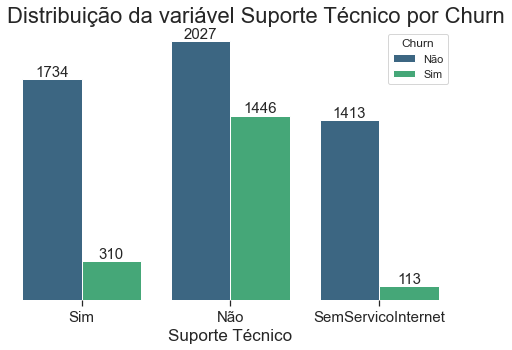

In [28]:
sd.plot_categorica(dataset = clientes,
                x = 'SuporteTecnico',
                titulo = 'Distribuição da variável Suporte Técnico por Churn',
                label_x='Suporte Técnico',
                hue = 'Churn', small=True)

In [29]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='SuporteTecnico',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada SuporteTecnico
----------------------------------
O opção Sim tem um total de 310 cancelamentos o que representa a porcetagem de 16.59% dos cancelamentos.
O opção Não tem um total de 1446 cancelamentos o que representa a porcetagem de 77.37% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



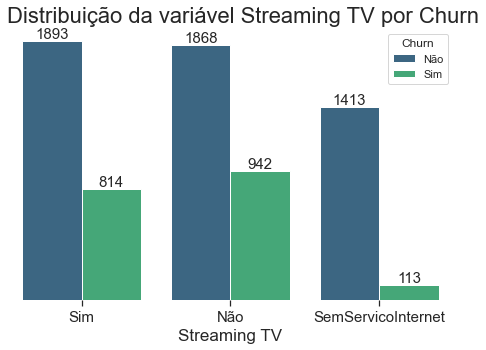

In [30]:
sd.plot_categorica(dataset = clientes,
                x = 'TVaCabo',
                titulo = 'Distribuição da variável Streaming TV por Churn',
                label_x='Streaming TV',
                hue = 'Churn', small=True)

In [31]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='TVaCabo',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada TVaCabo
----------------------------------
O opção Sim tem um total de 814 cancelamentos o que representa a porcetagem de 43.55% dos cancelamentos.
O opção Não tem um total de 942 cancelamentos o que representa a porcetagem de 50.4% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



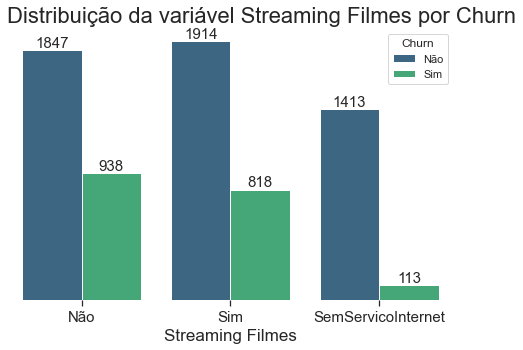

In [32]:
sd.plot_categorica(dataset = clientes,
                x = 'StreamingDeFilmes',
                titulo = 'Distribuição da variável Streaming Filmes por Churn',
                label_x='Streaming Filmes',
                hue = 'Churn', small=True)

In [33]:
sd.porcentagem_do_total(dataset=clientes,col_analisada='StreamingDeFilmes',col_comparada='Churn',valor_comparado='Sim')

Variavel avaliada StreamingDeFilmes
----------------------------------
O opção Não tem um total de 938 cancelamentos o que representa a porcetagem de 50.19% dos cancelamentos.
O opção Sim tem um total de 818 cancelamentos o que representa a porcetagem de 43.77% dos cancelamentos.
O opção SemServicoInternet tem um total de 113 cancelamentos o que representa a porcetagem de 6.05% dos cancelamentos.



### Informações sobre os pagamentos

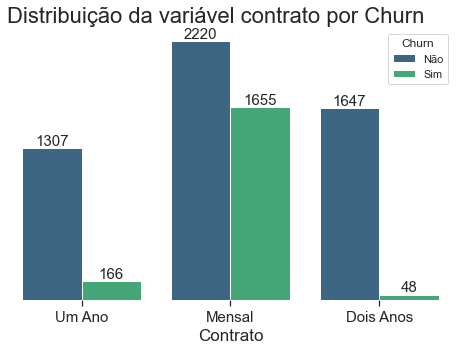

In [34]:
sd.plot_categorica(dataset = clientes,
                x = 'TipoDeContrato',
                titulo = 'Distribuição da variável contrato por Churn',
                label_x='Contrato',
                hue = 'Churn',
                small=True)

In [35]:
sd.porcentagem_do_total(dataset = clientes, col_analisada='TipoDeContrato', col_comparada='Churn', valor_comparado='Sim')

Variavel avaliada TipoDeContrato
----------------------------------
O opção Um Ano tem um total de 166 cancelamentos o que representa a porcetagem de 8.88% dos cancelamentos.
O opção Mensal tem um total de 1655 cancelamentos o que representa a porcetagem de 88.55% dos cancelamentos.
O opção Dois Anos tem um total de 48 cancelamentos o que representa a porcetagem de 2.57% dos cancelamentos.



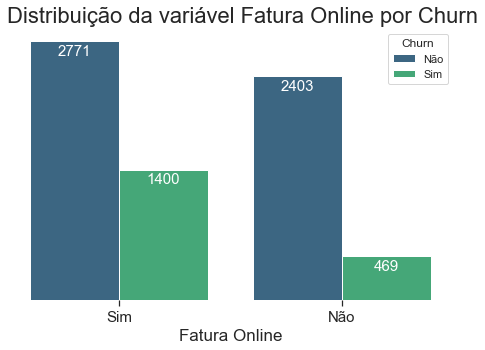

In [36]:
sd.plot_categorica(dataset = clientes,
                x = 'PagamentoOnline',
                titulo = 'Distribuição da variável Fatura Online por Churn',
                label_x='Fatura Online',
                hue = 'Churn')

In [37]:
sd.porcentagem_do_total(dataset = clientes, col_analisada='PagamentoOnline', col_comparada='Churn', valor_comparado='Sim')

Variavel avaliada PagamentoOnline
----------------------------------
O opção Sim tem um total de 1400 cancelamentos o que representa a porcetagem de 74.91% dos cancelamentos.
O opção Não tem um total de 469 cancelamentos o que representa a porcetagem de 25.09% dos cancelamentos.



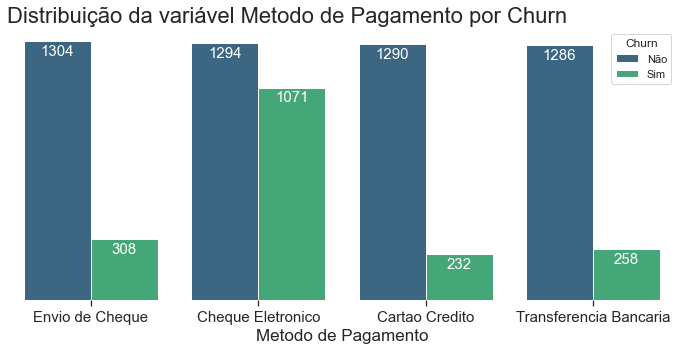

In [38]:
sd.plot_categorica(dataset = clientes,
                x = 'FormaDePagamento',
                titulo = 'Distribuição da variável Metodo de Pagamento por Churn',
                label_x = 'Metodo de Pagamento',
                figsize = (12,5),
                hue = 'Churn')

In [39]:
sd.porcentagem_do_total(dataset = clientes, col_analisada='FormaDePagamento', col_comparada='Churn', valor_comparado='Sim')

Variavel avaliada FormaDePagamento
----------------------------------
O opção Envio de Cheque tem um total de 308 cancelamentos o que representa a porcetagem de 16.48% dos cancelamentos.
O opção Cheque Eletronico tem um total de 1071 cancelamentos o que representa a porcetagem de 57.3% dos cancelamentos.
O opção Cartao Credito tem um total de 232 cancelamentos o que representa a porcetagem de 12.41% dos cancelamentos.
O opção Transferencia Bancaria tem um total de 258 cancelamentos o que representa a porcetagem de 13.8% dos cancelamentos.



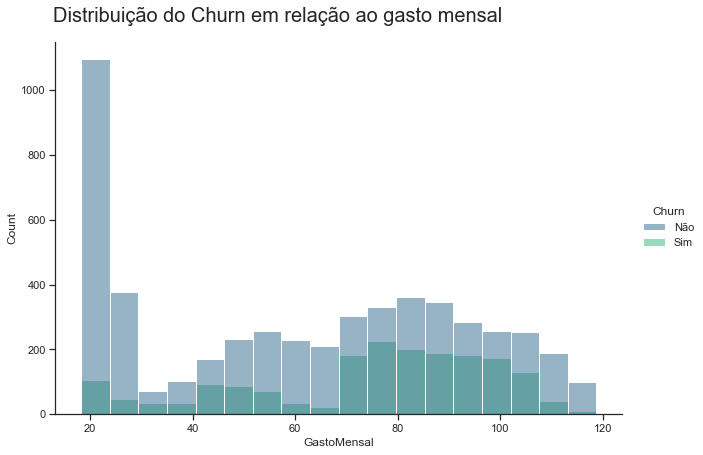

In [40]:
sd.plot_displot(dataset=clientes, 
                 x='GastoMensal', 
                 hue='Churn', 
                 titulo= 'Distribuição do Churn em relação ao gasto mensal', 
)

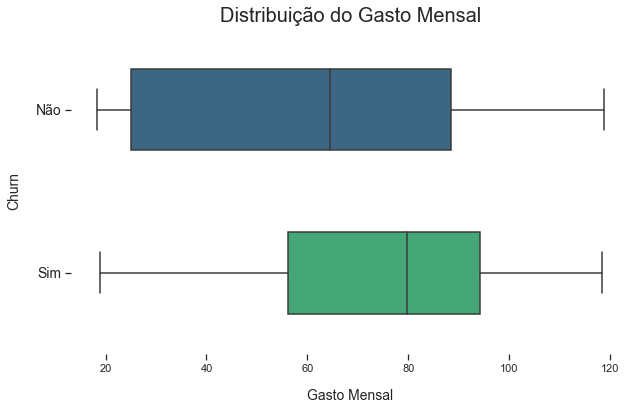

In [41]:
sd.box_comparacao_2d(dataset=clientes,
                      x='GastoMensal',
                      y='Churn',
                      titulo='Distribuição do Gasto Mensal', 
                      label_x='Gasto Mensal')

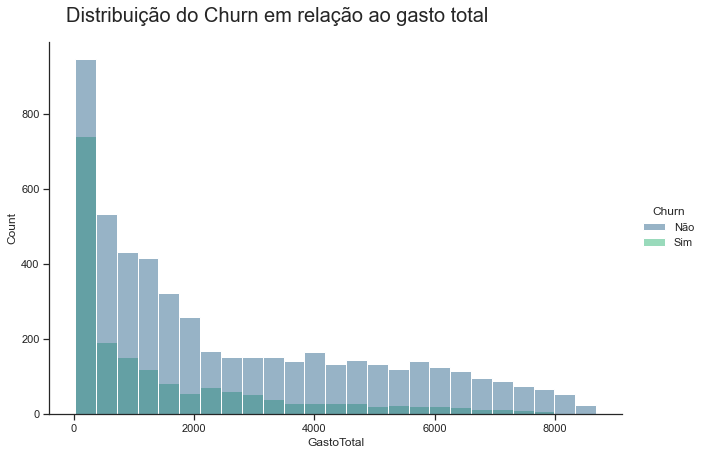

In [42]:
sd.plot_displot(dataset=clientes, 
                 x='GastoTotal', 
                 hue='Churn', 
                 titulo= 'Distribuição do Churn em relação ao gasto total', 
)

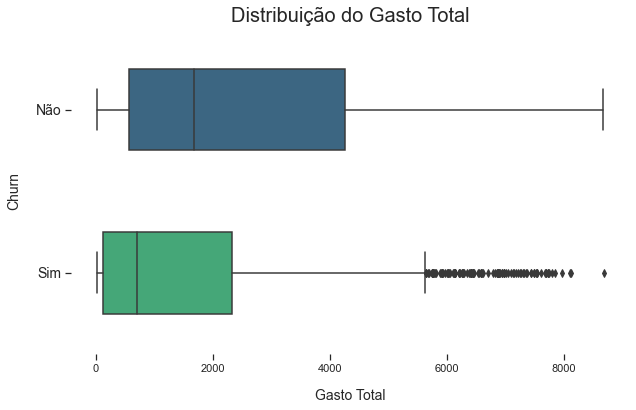

In [43]:
sd.box_comparacao_2d(dataset=clientes,
                      x='GastoTotal',
                      y='Churn',
                      titulo='Distribuição do Gasto Total', 
                      label_x='Gasto Total')

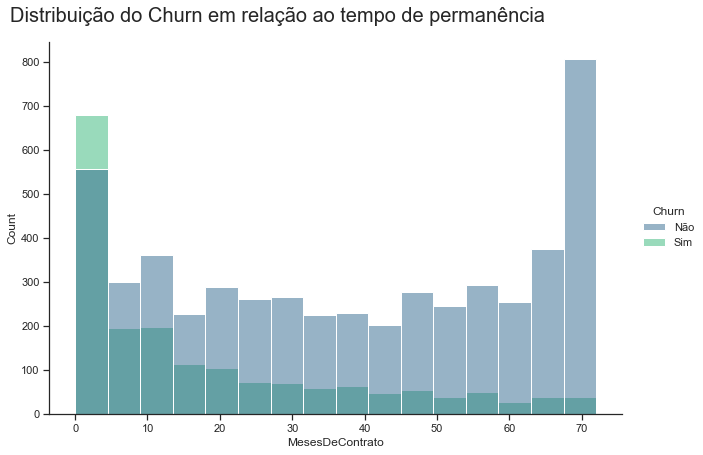

In [44]:
sd.plot_displot(dataset=clientes, 
                 x='MesesDeContrato', 
                 hue='Churn', 
                 titulo= 'Distribuição do Churn em relação ao tempo de permanência', 
)

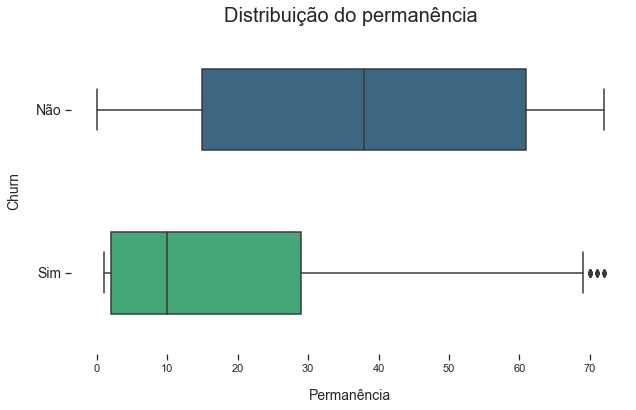

In [45]:
sd.box_comparacao_2d(dataset=clientes,
                      x='MesesDeContrato',
                      y='Churn',
                      titulo='Distribuição do permanência', 
                      label_x='Permanência')

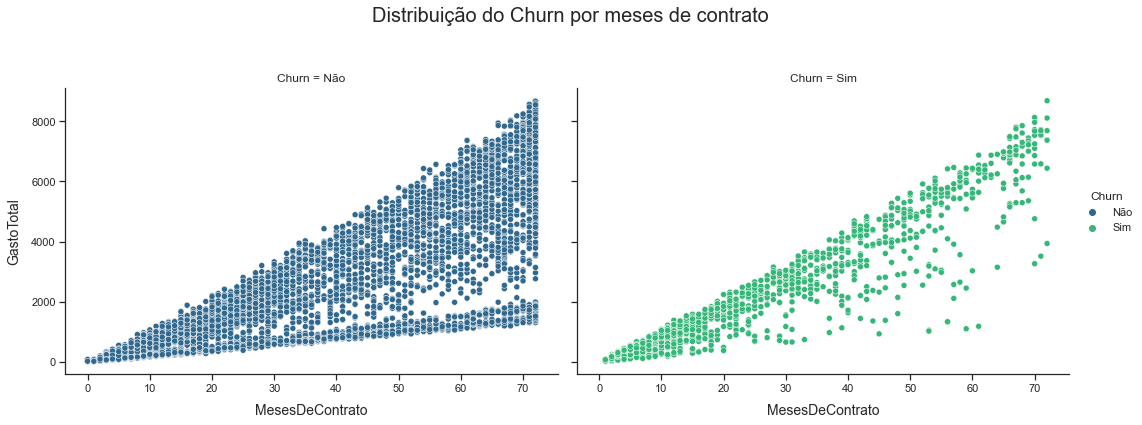

In [62]:
ax = sns.relplot(data=clientes,y='GastoTotal', x='MesesDeContrato', hue='Churn', col='Churn',aspect=1.5, palette='viridis')
ax.fig.suptitle('Distribuição do Churn por meses de contrato', fontsize = 20, y = 1.15)
ax.set_xlabels(fontsize=14, labelpad = 10)
ax.set_ylabels(fontsize=14, labelpad = 10)
plt.show()

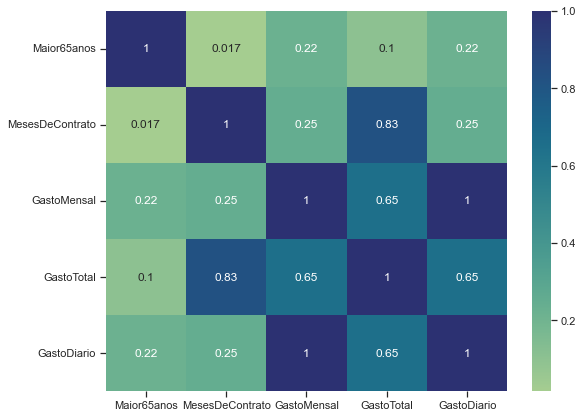

In [65]:
ax = sd.heatmap_corr(clientes)

Quando analisamos as correlações das variáveis quantitativas conseguimos observar que as variáveis `permanencia` e `GastoTotal` tem uma correlação muito forte, de 0.83, assim como as variáveis `GastoMensal` e `GastoDiario`,correlação de 1,sendo assim as variáveis `GastoDiario` e `GastoTotal` para os modelos de Machine Learning usados na próxima etapa.
